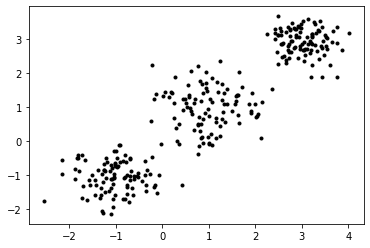

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
 
# Cargar el conjunto de datos Mall Customer Segmentation
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)

plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [2]:
from sklearn.cluster import KMeans
n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(X)


KMeans(n_clusters=4)

In [3]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

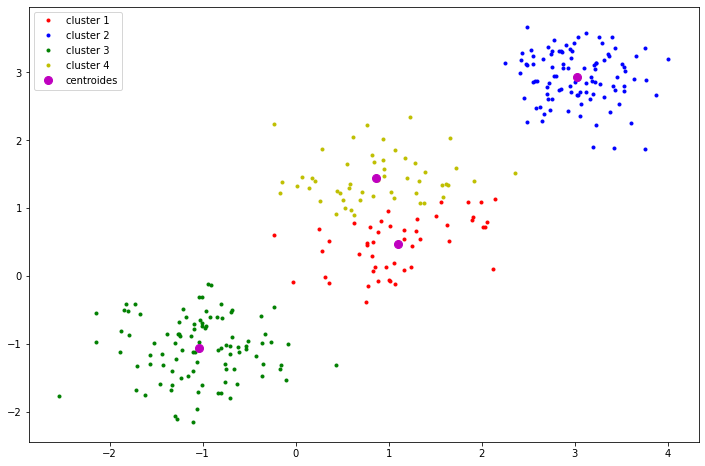

In [4]:
#Eje 0 y eje 1 donde etiqueta sea 0, 1 o 2
plt.figure(figsize=(12, 8)) 
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')
plt.plot(X[etiquetas==3,0],X[etiquetas==3,1],'y.', label='cluster 4')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

In [5]:
nClusters = range(1,10,1)

# Definimos una función que para un "k" dado corre el método kmeans sobre el dataset y devuelve el modelo generado.
def correrKmeans(k, dt):
    km = KMeans(n_clusters=k, n_init=10)
    score = round(km.fit(dt).score(dt)*-1)
    print ("K: "+str(k)+" - WSS:"+str(score)) 
    return score



# Ejecutamos
scores = [ correrKmeans(k, X) for k in nClusters ]

K: 1 - WSS:1759
K: 2 - WSS:489
K: 3 - WSS:146
K: 4 - WSS:120
K: 5 - WSS:101
K: 6 - WSS:85
K: 7 - WSS:74
K: 8 - WSS:64
K: 9 - WSS:57


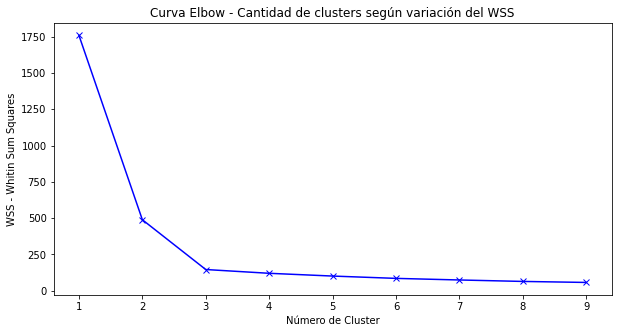

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(nClusters,scores,'bx-')
plt.xlabel('Número de Cluster')
plt.ylabel('WSS - Whitin Sum Squares')
plt.title('Curva Elbow - Cantidad de clusters según variación del WSS')
plt.show()

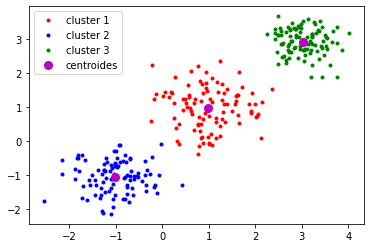

In [7]:
n = 3
k_means = KMeans(n_clusters=n, init="random", max_iter=3)
k_means.fit(X)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
#Eje 0 y eje 1 donde etiqueta sea 0, 1 o 2
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(8, 3))
%matplotlib widget